# 00. Table of Contents

01. Notebook Setup

- Import libraries
- Import datasets as dataframes
- Join tables for exploration


02. Exploring Relationships

- Correlations
- Scatterplots
- Pair plots
- Categorical plots

03. Initial Observations

- Answering Questions
- New Questions to Explore
- Potential Hypotheses for Exploration

04. Export new data frames

# 01. Notebook Setup

## 01.01 Import libraries

In [1]:
# Import libraries

import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib


In [2]:
# Create quick path to project folder

projpath = r'/Users/laineyodette/Documents/_proDocs/professional development/Learning/Learning - Data Analytics/CareerFoundry - Become a Data Analyst/Data Immersion Course/A6 - Advanced Analytics and Dashboard Design/Book Project'


## 01.02 Import datasets as dataframe

In [3]:
# Import ALL THREE datasets as dataframes

df_Users = pd.read_csv(os.path.join(projpath, '02 Data', 'Dataset', 'Users-PREPPED.csv'), index_col = 0)
df_Books = pd.read_csv(os.path.join(projpath, '02 Data', 'Dataset', 'Books-PREPPED.csv'), index_col = 0)
df_Ratings = pd.read_csv(os.path.join(projpath, '02 Data', 'Dataset', 'Ratings-PREPPED.csv'), index_col = 0)


## 01.3 Join Tables for Explorations

In [4]:
# Create a df with Ratings and Users df combined (CHATGPT AIDED CODE)

# Perform an inner join on df_Ratings and df_Users using the 'User_Id' key
df_ratingsUsers = pd.merge(df_Ratings, df_Users, on='User-ID', how='inner')

# Display the first few rows of the resulting dataframe
df_ratingsUsers.head()


,User-ID,ISBN,Book-Rating,Age,Location,Country,Original Country
0,276726,0155061224,5,22,"seattle, washington, usa",United States of America,usa
1,276729,052165615X,3,16,"rijeka, n/a, croatia",Croatia,croatia
2,276729,0521795028,6,16,"rijeka, n/a, croatia",Croatia,croatia
3,276736,3257224281,8,27,"salzburg, salzburg, austria",Austria,austria
4,276737,0600570967,6,14,"sydney, new south wales, australia",Australia,australia


In [5]:
df_ratingsUsers.shape

(409283, 7)

In [6]:
# Add the Books df to the ratingsUsers df (CHATGPT AIDED CODE)

# Perform an inner join using the 'User_Id' key
df_booksRatingsUsers = pd.merge(df_ratingsUsers, df_Books, on='ISBN', how='inner')

# Display the first few rows of the resulting dataframe
df_booksRatingsUsers.head()


,User-ID,ISBN,Book-Rating,Age,Location,Country,Original Country,Book-Title,Book-Author,Year-Of-Publication,Publisher
0,276726,0155061224,5,22,"seattle, washington, usa",United States of America,usa,Rites of Passage,Judith Rae,2001,Heinle
1,276729,052165615X,3,16,"rijeka, n/a, croatia",Croatia,croatia,Help!: Level 1,Philip Prowse,1999,Cambridge University Press
2,276729,0521795028,6,16,"rijeka, n/a, croatia",Croatia,croatia,The Amsterdam Connection : Level 4 (Cambridge ...,Sue Leather,2001,Cambridge University Press
3,276744,038550120X,7,55,"torrance, california, usa",United States of America,usa,A Painted House,JOHN GRISHAM,2001,Doubleday
4,16877,038550120X,9,37,"houston, arkansas, usa",United States of America,usa,A Painted House,JOHN GRISHAM,2001,Doubleday


In [7]:
df_booksRatingsUsers.shape

(357638, 11)

In [8]:
# Create a subset

## 01.4 Data Quality Checks

In [9]:
# Find missing values by summing the number of null values in each column

df_ratingsUsers.isnull().sum()

User-ID             0
ISBN                0
Book-Rating         0
Age                 0
Location            0
Country             0
Original Country    0
dtype: int64

In [10]:
# Find missing values by summing the number of null values in each column

df_booksRatingsUsers.isnull().sum()

User-ID                0
ISBN                   0
Book-Rating            0
Age                    0
Location               0
Country                0
Original Country       0
Book-Title             0
Book-Author            0
Year-Of-Publication    0
Publisher              0
dtype: int64

# 02. Exploring Relationships

## 02.01 Correlations

In [11]:
# Create a correlation matrix using pandas

df_ratingsUsers[['Book-Rating', 'Age']].corr()

,Book-Rating,Age
Book-Rating,1.000000,0.015551
Age,0.015551,1.000000


Text(0.5, 1.0, 'Correlation Matrix')

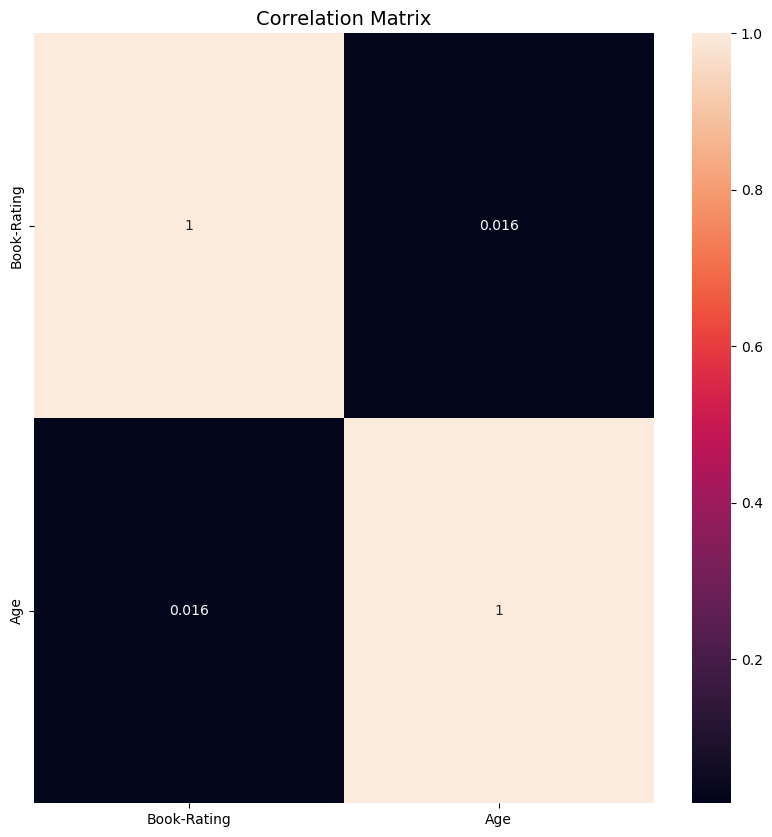

In [12]:
# Create a subplot with matplotlib
f, ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above
corr = sns.heatmap(df_ratingsUsers[['Book-Rating', 'Age']].corr(), annot = True, ax = ax) 
plt.title('Correlation Matrix', fontsize=14) 
# The 'annot' argument places the correlation coefficients onto the heatmap.
# The 'ax' argument plots the heatmap on the defined axes.
# The 'title' annotation adds the title

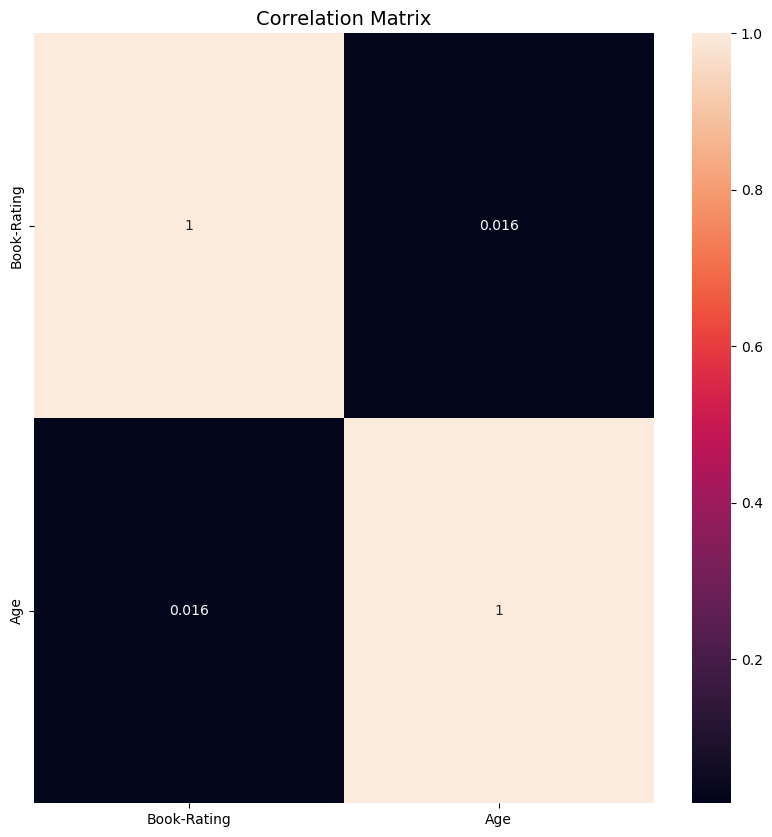

In [13]:
# Save figure in the working directory

f, ax = plt.subplots(figsize = (10, 10))
corr = sns.heatmap(df_ratingsUsers[['Book-Rating', 'Age']].corr(), annot = True, ax = ax)
plt.title('Correlation Matrix', fontsize=14) 

plt.savefig('correlation_heatmap.png')

<b>OBSERVATION</b>

<i>Discuss what the coefficients in the plot mean in terms of the relationships between the variables.</i>

--------------

Using the correlation scale as follows (and ignoring the matrix boxes aligning self with self), there is essentially no relationship between a reader's age and the rating they gave a book.

0: no relationship
0.1–0.3: weak relationship
0.3–0.5: moderate relationship
0.5–1.0: strong relationship

## 02.02 Scatterplots

/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


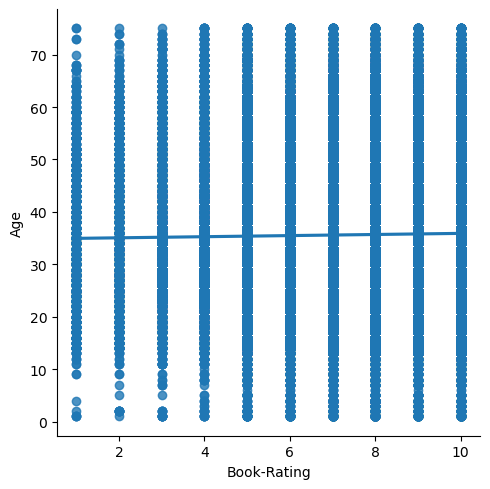

In [14]:
# Create a scatterplot for the "book rating" and "age" columns in seaborn

sns.lmplot(x = 'Book-Rating', y = 'Age', data = df_ratingsUsers)

<b>OBSERVATION</b>

Examine the nature of their relationships; Discuss the output.

-----------------

Based on this visual, there still does not appear to be a correlation between the age of the reader and the book ratings. However, you can see a potential pattern of younger and older readers not rating books with a lower score as often as other ages. This may be something to explore further through hypothesis testing.

## 02.03 Pair Plots

In [15]:
# Keep only the variables to be used in the pair plot

sub = df_ratingsUsers[['Book-Rating', 'Age']] 

/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


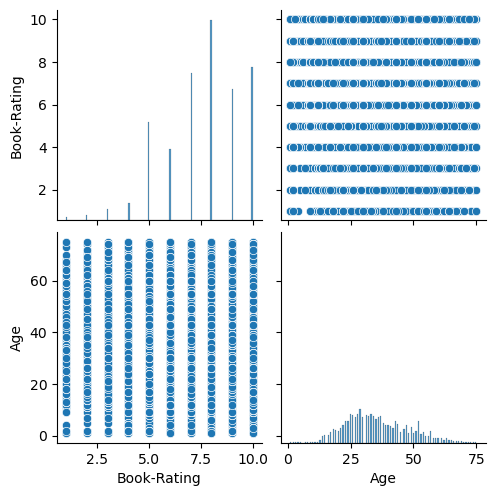

In [16]:
# Create pair plot 

g = sns.pairplot(sub)

<b>OBSERVATION</b>

<i>Comment on the distribution of the variables and mark variables you’d like to explore further with an explanation of why.</i>

-------------

- In looking at the age distribution of the readers, the distribution skews right a bit, so mean is greater than the median.
- The main trend for the book ratings is that readers are more likely to rate a book higher than lower.

As my dataset only has these two numeric data values, they are the only ones I can evaluate here and therefore will be further explored. I will be able to explore more deeply once the other categorical pieces of data are folded in.

## 02.04 Categorical Plots

##### Creating a categorical variable that splits the "Age" column into categories

/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Age', ylabel='Count'>

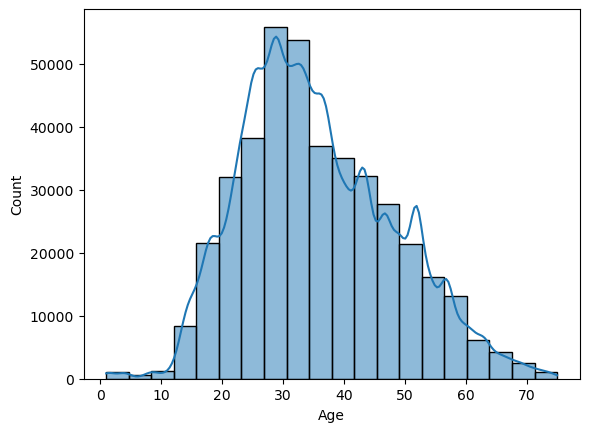

In [17]:
# Use a histogram to visualize the distribution of the variables. 
# The argument "kde" adds a line that encompasses the distribution

sns.histplot(df_ratingsUsers['Age'], bins = 20, kde = True)

In [18]:
# Determine sensible categories for age. 
# Young < 26
# Adult 26-45
# Older 46+

In [19]:
df_ratingsUsers.loc[df_ratingsUsers['Age'] < 26, 'Age Category'] = 'Young'

In [20]:
df_ratingsUsers.loc[(df_ratingsUsers['Age'] >= 26) & (df_ratingsUsers['Age'] <= 45), 'Age Category'] = 'Adult'

In [21]:
df_ratingsUsers.loc[df_ratingsUsers['Age'] >= 46, 'Age Category'] = 'Older'

In [22]:
df_ratingsUsers['Age Category'].value_counts(dropna = False)

Age Category
Adult    227179
Older     92325
Young     89779
Name: count, dtype: int64

In [23]:
df_ratingsUsers.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Age', 'Location', 'Country',
       'Original Country', 'Age Category'],
      dtype='object')

/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


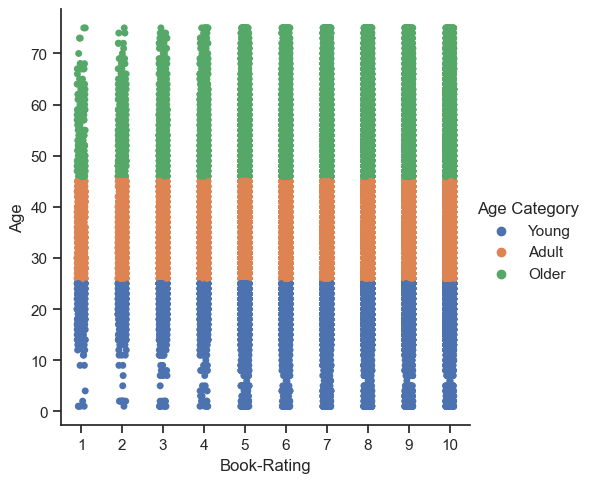

In [24]:
# Create a categorical plot in seaborn using the age categories created above

sns.set(style = "ticks")
g = sns.catplot(x = "Book-Rating", y = "Age", hue = "Age Category", data = df_ratingsUsers)

<b>OBSERVATION</b>

<i>Interpret the results.</i>

-----------

- Distribution of reader ages is confirmed as a right-skewed distribution with the majority of readers being around 30 YO (just above or just below the 30-year mark).
- There are very few "young" readers (<26) and "older" readers (45+) compared to the "adult" group.
- When categorizing the reader's ages, it appears there are less ratings in the lower range (<4) given by readers in the older and younger categories.

##### Creating a categorical variable that splits the "Book Ratings" column into categories

/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Book-Rating', ylabel='Count'>

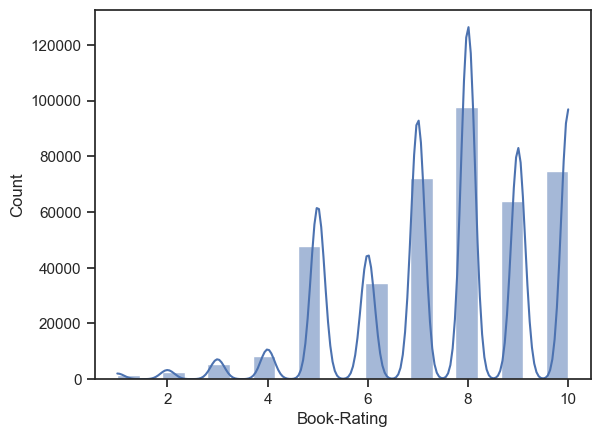

In [25]:
# Use a histogram to visualize the distribution of the variables. 
# The argument "kde" adds a line that encompasses the distribution

sns.histplot(df_ratingsUsers['Book-Rating'], bins = 20, kde = True)

In [26]:
# Determine sensible categories for the book ratings. 
# low rating < 4
# mid rating 4-7
# high rating > 7

In [27]:
df_ratingsUsers.loc[df_ratingsUsers['Book-Rating'] <= 3, 'Rating Category'] = 'Low Rating'

In [28]:
df_ratingsUsers.loc[(df_ratingsUsers['Book-Rating'] >= 4) & (df_ratingsUsers['Book-Rating'] <= 7), 'Rating Category'] = 'Mid Rating'

In [29]:
df_ratingsUsers.loc[df_ratingsUsers['Book-Rating'] >= 8, 'Rating Category'] = 'High Rating'

In [30]:
df_ratingsUsers['Rating Category'].value_counts(dropna = False)

Rating Category
High Rating    236756
Mid Rating     162900
Low Rating       9627
Name: count, dtype: int64

In [31]:
df_ratingsUsers.columns

Index(['User-ID', 'ISBN', 'Book-Rating', 'Age', 'Location', 'Country',
       'Original Country', 'Age Category', 'Rating Category'],
      dtype='object')

/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  self._figure.tight_layout(*args, **kwargs)
/Users/laineyodette/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


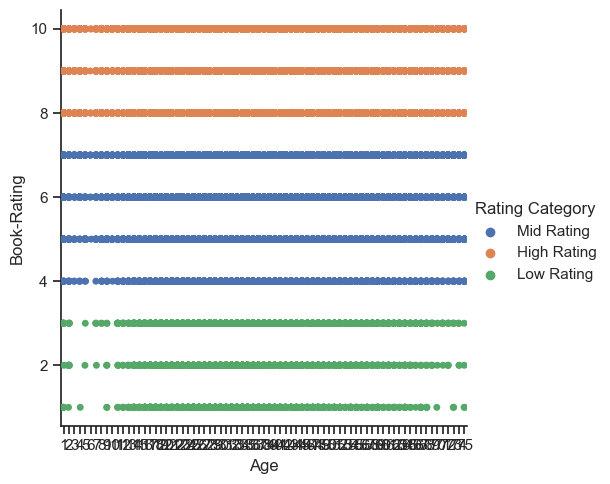

In [32]:
# Create a categorical plot in seaborn using the price categories created above

sns.set(style = "ticks")
g = sns.catplot(x = "Age", y = "Book-Rating", hue = "Rating Category", data = df_ratingsUsers)

<b>OBSERVATION</b>

<i>Interpret the results.</i>

-----------

- There are more ratings in the middle (4-7) and the higher end (8+), so there are less ratings in the low range (<4).
- Again, there is a pattern that the younger and older readers are not rating as much in that lower rating range.

# 03. Initial Observations

## 03.01 Answering Questions

<i>Revisit the questions you generated in the previous task and write answers to those you can based on the exploration you’ve conducted so far.</i>

-----------

<b>- What are the top-rated book titles?</b>
|| Unanswerable just yet. Titles not part of current evaluation.

<b>- Who are the top-rated book authors?</b>
|| Unanswerable just yet. Authors not part of current evaluation.

<b>- Which publishers are associated with the top-rated book titles? Top-rated book authors?</b>
|| Unanswerable just yet. Publishers and authors not part of current evaluation.

<b>- Where is the audience for this application? (Where are the people who are submitting the ratings?)</b>
|| While there are a range of ages using this database and rating books, the distribution indicates that most users are in the adult, mid-age category.

<b>- Is there a pattern of age and book rating for the top titles? Top authors? (help predict popularity of future titles by an author by age / location?)</b>
|| Unanswerable just yet. Will need to apply current observations of age and rating against other categorical factors such as title and author to answer this.

<b>- How has the book industry involved over time? Number of books published per year? Publishers coming into the market / leaving the market? Are there more authors now versus historically?</b>
|| Unanswerable just yet. May be answered during time analysis.

## 03.02 New Questions to Explore

<i>Add any new questions that may have arisen based on the early findings in your visual exploration.</i>

--------

I would be interested to explore if there truly is a relationship between age and the book ratings. It almost seems like older and younger readers are less likely to rate a book low based on the analysis seen here. Or is it more because there are less older and younger users of this database? Or simply because there are just less lower ratings in the first place?

## 03.03 Potential Hypotheses for Exploration

<i>Define any hypotheses that you can at this point.</i>

-----------

The middle-aged (adult) readers are more likely to give a book a low rating.

# 04. Export new data frames

(Just in case need combined and modified df in future analysis)

In [33]:
# Export ratingsUsers dataframe 

df_ratingsUsers.to_csv(os.path.join(projpath, '02 Data','Dataset', 'ratingsUsers.csv'))


In [34]:
# Export booksRatingsUsers dataframe 

df_booksRatingsUsers.to_csv(os.path.join(projpath, '02 Data','Dataset', 'booksRatingsUsers.csv'))
